In [240]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv('C:/Users/ramon/OneDrive/Documents/Data Analyst Projects/Movies Analytics/movies.csv')


In [241]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [242]:
len(df)

7668

In [243]:
#looking for missing data
print("Column  missing  total missing") 
for columns in df.columns:
    percent_missing = np.mean(df[columns].isnull()) * 100
    total_rows = len(df)
    total_emptyrows = percent_missing * (total_rows / 100)
    print(f'{columns}      {percent_missing:.2f}%      {round(total_emptyrows)}')
print("total rows",len(df)) 

Column  missing  total missing
name      0.00%      0
rating      1.00%      77
genre      0.00%      0
year      0.00%      0
released      0.03%      2
score      0.04%      3
votes      0.04%      3
director      0.00%      0
writer      0.04%      3
star      0.01%      1
country      0.04%      3
budget      28.31%      2171
gross      2.46%      189
company      0.22%      17
runtime      0.05%      4
total rows 7668


In [244]:
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [252]:
df.sort_values(by=['gross'],inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149


<Axes: xlabel='budget', ylabel='gross'>

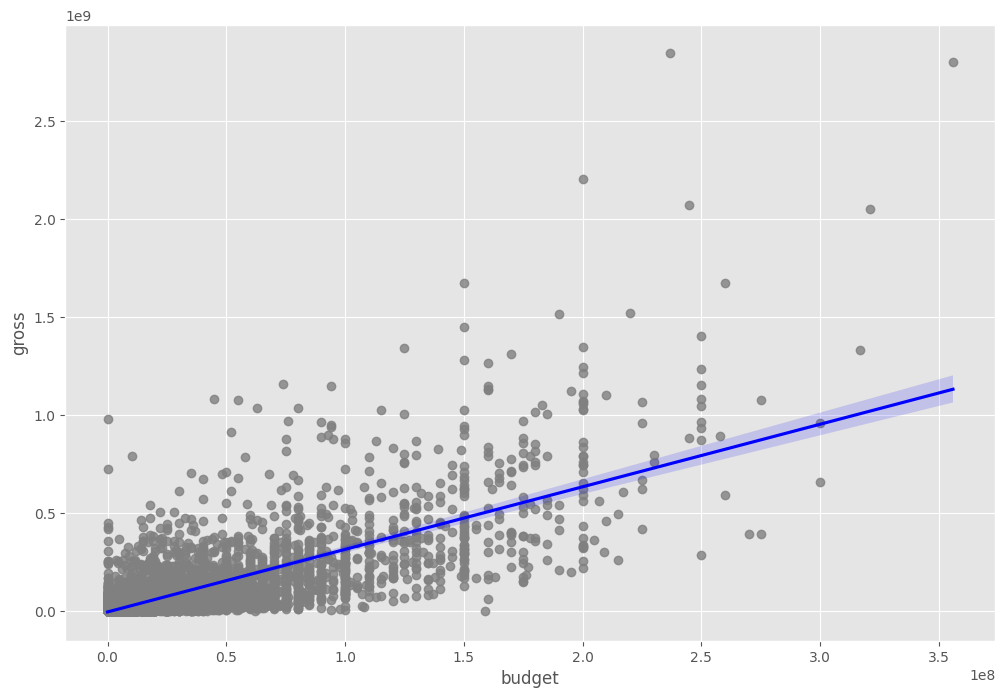

In [246]:
#Plot Budget vs gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})

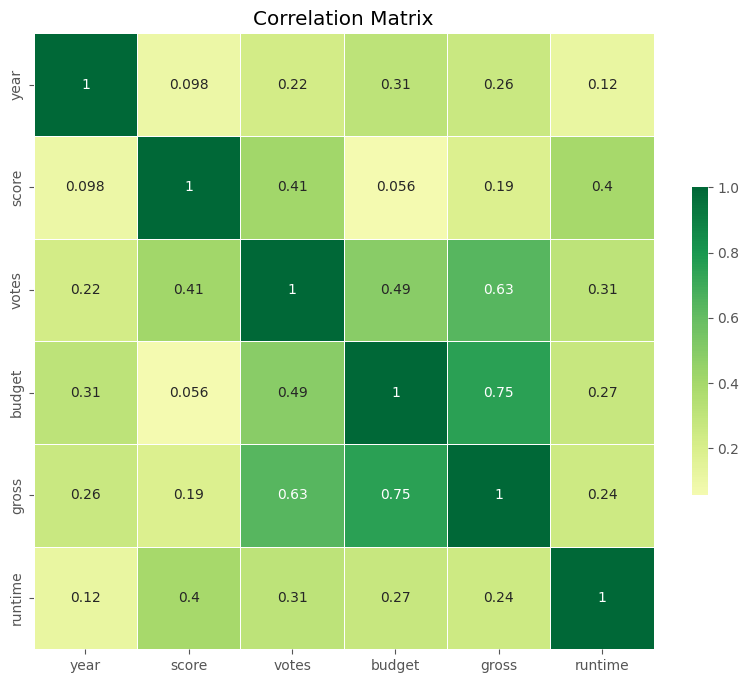

In [247]:
def correlation(df):

    plt.figure(figsize=(10, 8))

    sns.heatmap(dfcorr, 
            annot=True,
            cmap='RdYlGn',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink":0.5})

    plt.title("Correlation Matrix")
    plt.show()
correlation(df)

In [251]:
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98


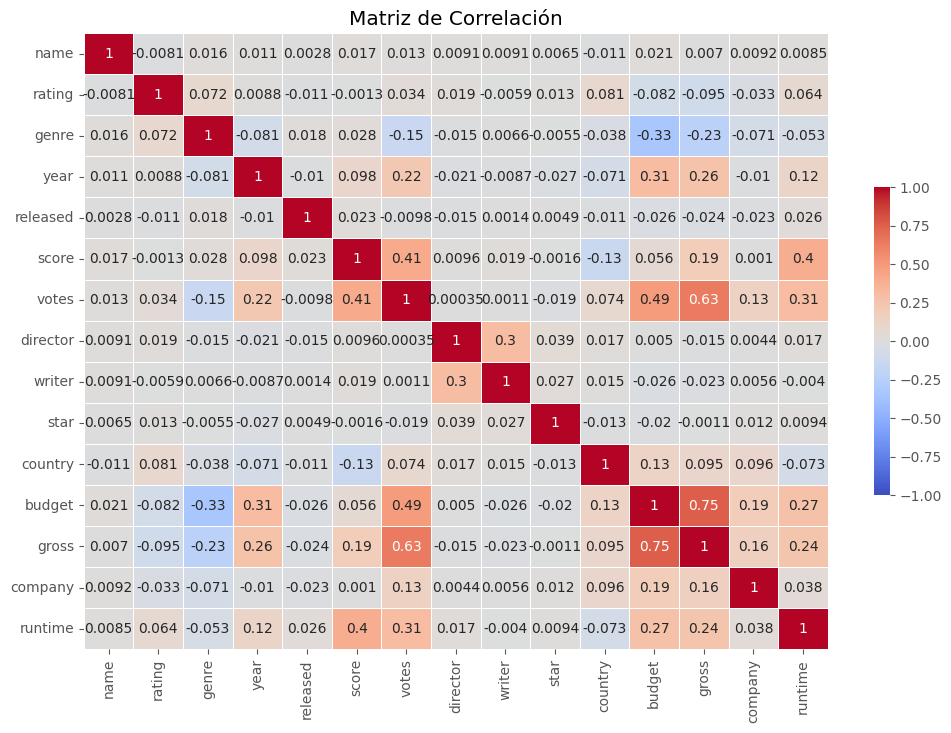

In [249]:
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            center=0, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5}, 
            vmin=-1, vmax=1)

plt.title("Matriz de Correlación")
plt.show()



In [236]:
df_cleaned = df.dropna()
corr = df_cleaned.corr()
#table form
corr_pairs = corr.unstack().sort_values(ascending=False)
#delete duplicated corr for a better visual
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]
#delete corr for same columns
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

high_corr = corr_pairs[(abs(corr_pairs) > 0.7)]
moderate_corr = corr_pairs[(abs(corr_pairs) >= 0.3) & (abs(corr_pairs) <= 0.7)]
low_corr = corr_pairs[(abs(corr_pairs) < 0.3)]

def highlight_corr(val):
    if abs(val) > 0.7:
        return 'color: forestgreen; font-weight: bold'
    elif abs(val) >= 0.3:
        return 'color: green'
    else:
        return 'color: black'

corr_dict = {
    "High correlation (> 0.7)": high_corr,
    "Mid correlation (0.3 - 0.7)": moderate_corr,
    "Low correlation (< 0.3)": low_corr
}

for title, corr_data in corr_dict.items():
    display(HTML(f'<h2 style="color:#585858">{title}</h2>'))
    corr_df = corr_data.to_frame()
    corr_df.columns = ['Correlation']
    corr_styled = corr_df.style.applymap(highlight_corr)
    display(corr_styled)

,,Correlation
budget,gross,0.750133


,,Correlation
gross,votes,0.632834
budget,votes,0.486862
score,votes,0.409182
runtime,score,0.398387
budget,year,0.309873
runtime,votes,0.307074
budget,genre,-0.334087
